# 🟦 決定木

アヤメの分類

`iris` データセットの列（特徴量）は以下の4つです。

1. `sepal length (cm)`（がく片の長さ）
2. `sepal width (cm)`（がく片の幅）
3. `petal length (cm)`（花弁の長さ）
4. `petal width (cm)`（花弁の幅）

目的変数（分類対象）はアヤメの品種で、3種類あります。

* `setosa`
* `versicolor`
* `virginica`


In [11]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
pd.set_option("display.max_rows", None)   # 行をすべて表示
pd.set_option("display.max_columns", None)  # 列をすべて表示
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


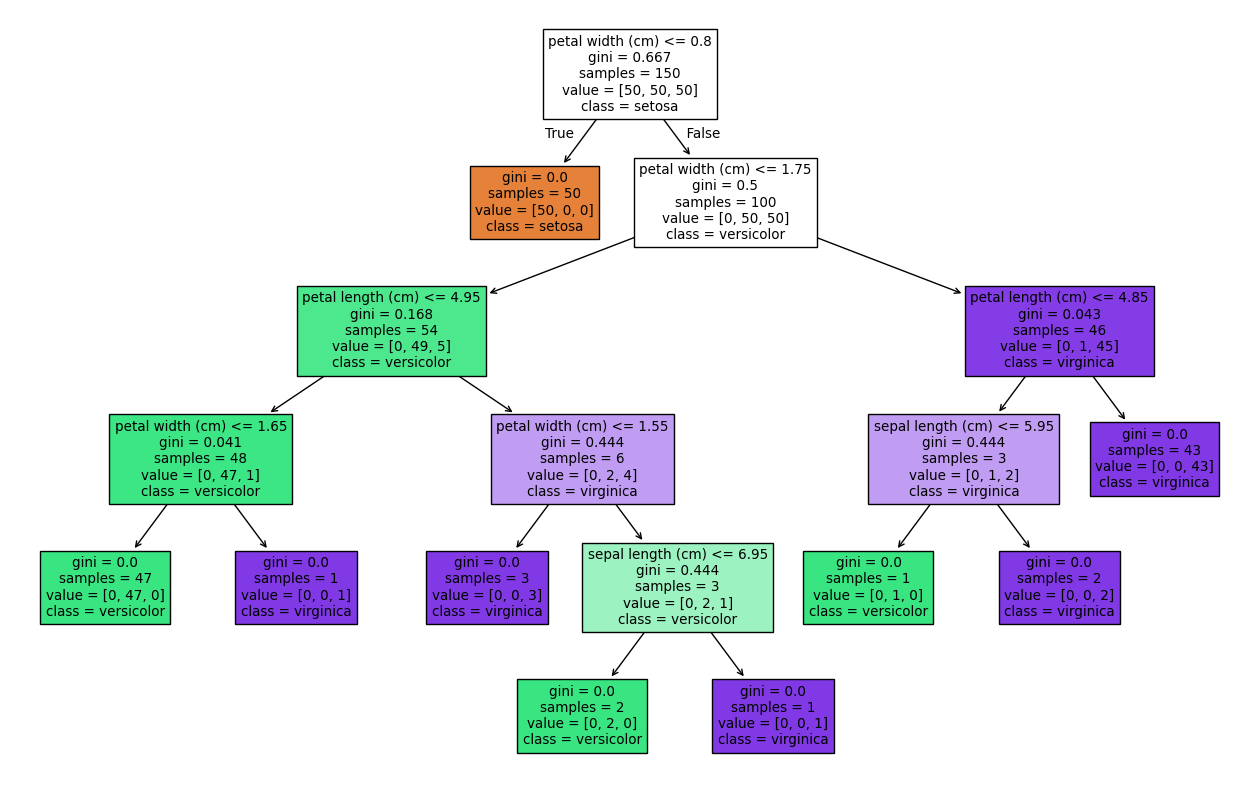

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


### ① 分岐の候補の作り方

決定木では、**各特徴量（カラム）ごとにすべての可能な分割点（閾値）を候補**として試します。

例えば特徴量 (x) が連続値だとすると、
訓練データ内のユニークな値を小さい順に並べて、
その**隣り合う値の中点**を分割候補にします。

例：

```
x = [1, 3, 4, 6]
→ 候補の境界 = 2, 3.5, 5
```

---

### ② 各候補に対して不純度を計算

それぞれの候補（例では2, 3.5, 5）でデータを左右に分割し、
そのときの **ジニ係数の加重平均** を求めます。

$$
G_{\text{split}} = \frac{n_L}{n} G_L + \frac{n_R}{n} G_R
$$

ここで

* $ n_L, n_R $：左・右ノードのサンプル数
* $ G_L, G_R $：それぞれのノードのジニ係数
* $ n $：全体のサンプル数

---

### ③ 最もジニ係数が小さい分割を選ぶ

候補の中で **不純度（ジニ係数の加重平均）が最も小さい分割**を採用します。
これが「最適な境界」です。

---

### ④ 境界の更新というより「全探索」

質問にある「境界を更新して繰り返す」というよりも、
実際には **すべての候補を総当たりして最良のものを選ぶ** という形です。

数値最適化のように勾配を使って境界を動かすわけではなく、
**全候補を試して最小の不純度を与える境界を確定的に選ぶ**、というのが決定木の特徴です。

---

最初の分岐（ルートノード）を決めるときには、
「すべての説明変数 × その変数内のすべての分割候補」 について
ジニ係数（またはエントロピー）の計算を行います。